## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from datetime import timedelta
from datetime import datetime

## Load the data

In [2]:
data2 = pd.read_csv('B:/My Works/Data Science/Grassroots/Sept/users_all_pub_all_time.csv', parse_dates=True)
data1 = pd.read_csv("B:/My Works/Data Science/Grassroots/Sept/tx_all_pub_all_time.csv", parse_dates = True)


B:\Conda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#sort the id in order
data1_mod =data1.sort_values('id')
data1_mod

,id,timeset,transfer_subtype,transfer_use,source,s_comm_tkn,s_gender,s_location_path,s_location_lat,s_location_lon,...,t_gender,t_location_path,t_location_lat,t_location_lon,t_business_type,tx_token,weight,type,token_name,token_address
0,1,2020-01-25 19:13:17.731529,DISBURSEMENT,NaN,0xEDA5C9B75Fdb3B9bdAB987A704632280Cf93084F,None,NaN,None,None,None,...,female,None,None,None,Savings Group,NaN,18000.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
1,2,2020-01-25 19:13:19.056070,DISBURSEMENT,NaN,0xEDA5C9B75Fdb3B9bdAB987A704632280Cf93084F,None,NaN,None,None,None,...,male,"Kilifi,Kilifi,Coastal Kenya",39.85,-3.6333,Farming/Labour,NaN,9047.660892,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
2,3,2020-01-25 19:13:20.288346,DISBURSEMENT,NaN,0xEDA5C9B75Fdb3B9bdAB987A704632280Cf93084F,None,NaN,None,None,None,...,male,"Kilifi,Kilifi,Coastal Kenya",39.85,-3.6333,Farming/Labour,NaN,25378.726002,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
3,4,2020-01-25 19:13:21.478850,DISBURSEMENT,NaN,0xEDA5C9B75Fdb3B9bdAB987A704632280Cf93084F,None,NaN,None,None,None,...,male,"Kilifi,Kilifi,Coastal Kenya",39.85,-3.6333,Health,NaN,4495.932576,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
47166,5,2020-01-26 07:48:43.042684,DISBURSEMENT,NaN,0xBDB3Bc887C3b70586BC25D04d89eC802b897fC5F,None,NaN,None,None,None,...,male,None,None,None,Farming/Labour,NaN,400.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314900,488178,2020-08-31 04:30:33.052689,STANDARD,NaN,0x202fBB44E14A108BF8C76db6E7F47A36647ea98E,None,female,None,None,None,...,female,"Mukuru Kayaba Village,Plainsview Road,South B,...",36.84450844411661,-1.3112602,Food/Water,NaN,200.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
332165,488179,2020-08-31 04:31:44.341178,STANDARD,NaN,0x202fBB44E14A108BF8C76db6E7F47A36647ea98E,None,female,None,None,None,...,female,"Mukuru Kayaba Village,Plainsview Road,South B,...",36.84450844411661,-1.3112602,Food/Water,NaN,200.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
322609,488180,2020-08-31 04:32:43.320605,STANDARD,NaN,0x202fBB44E14A108BF8C76db6E7F47A36647ea98E,None,female,None,None,None,...,male,None,None,None,Shop,NaN,200.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
159416,488181,2020-08-31 04:32:57.880422,STANDARD,NaN,0x8666eEC702bb9a2Eb25f325DCA723450EF3E8340,None,Unknown gender,None,None,None,...,Female,"Mnyenzeni,Kwale,Coastal Kenya",39.5,-3.9833,Savings Group,NaN,400.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4


In [4]:
#load the saved data
d1 = pd.read_csv('B:/My Works/Data Science/Grassroots/data_edit.csv', usecols=['id','timeset','transfer_subtype','t_gender','t_business_type','weight' ], parse_dates=True)
d1.head()

,id,timeset,transfer_subtype,t_gender,t_business_type,weight
0,1,2020-01-25 19:13:17.731529,DISBURSEMENT,female,Savings Group,18000.000000
1,2,2020-01-25 19:13:19.056070,DISBURSEMENT,male,Farming/Labour,9047.660892
2,3,2020-01-25 19:13:20.288346,DISBURSEMENT,male,Farming/Labour,25378.726002
3,4,2020-01-25 19:13:21.478850,DISBURSEMENT,male,Health,4495.932576
4,5,2020-01-26 07:48:43.042684,DISBURSEMENT,male,Farming/Labour,400.000000


In [5]:
data2_mod = data2.sort_values('id')
data2_mod

,id,start,label,gender,location,lat,lon,held_roles,business_type,bal,...,otxns_in,otxns_out,ounique_in,ounique_out,svol_in,svol_out,stxns_in,stxns_out,sunique_in,sunique_out
36331,1,2020-01-25 19:10:50.218686,1,NaN,None,None,None,ADMIN,System,9000.000000,...,0,8,0,8,0.0,0.0,0,0,0,0
36016,2,2018-10-23 09:09:58,2,female,None,None,None,TOKEN_AGENT,Savings Group,2033.000000,...,271,31,125,0,0.0,15000.0,0,1,0,1
16339,3,2018-10-21 14:20:57,3,male,"Kilifi,Kilifi,Coastal Kenya",39.85,-3.6333,BENEFICIARY,Farming/Labour,56.660892,...,2,2,2,0,0.0,9007.0,0,1,0,1
36086,4,2018-10-21 15:38:30,4,male,"Kilifi,Kilifi,Coastal Kenya",39.85,-3.6333,BENEFICIARY,Farming/Labour,2405.886002,...,11,2,2,0,22069.1,61400.0,26,25,15,10
36042,5,2018-10-23 14:10:27,5,male,"Kilifi,Kilifi,Coastal Kenya",39.85,-3.6333,BENEFICIARY,Health,2144.582576,...,32,2,5,0,246569.3,308655.0,285,292,136,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,38882,2020-08-30 16:14:14.085383,38882,male,None,None,None,BENEFICIARY,None,50.000000,...,1,0,1,0,50.0,50.0,1,1,0,1
15422,38883,2020-08-30 16:24:12.787055,38883,Unknown gender,None,None,None,BENEFICIARY,None,50.000000,...,1,0,1,0,0.0,0.0,0,0,0,0
15598,38885,2020-08-30 17:18:51.389539,38885,male,None,None,None,BENEFICIARY,None,50.000000,...,1,0,1,0,50.0,50.0,1,1,0,1
27061,38886,2020-08-31 03:45:01.375101,38886,Unknown gender,None,None,None,BENEFICIARY,None,350.000000,...,1,0,1,0,300.0,0.0,1,0,1,0


In [6]:
d2 = pd.read_csv('B:/My Works/Data Science/Grassroots/users_edit.csv', parse_dates=True)
d2.head()

,id,start,label,gender,location,lat,lon,held_roles,business_type,bal,...,otxns_in,otxns_out,ounique_in,ounique_out,svol_in,svol_out,stxns_in,stxns_out,sunique_in,sunique_out
0,1,2020-01-25 19:10:50.218686,1,NaN,None,None,None,ADMIN,System,9000.000000,...,0,8,0,8,0.0,0.0,0,0,0,0
1,2,2018-10-23 09:09:58,2,female,None,None,None,TOKEN_AGENT,Savings Group,42599.000000,...,268,30,124,0,0.0,0.0,0,0,0,0
2,3,2018-10-21 14:20:57,3,male,"Kilifi,Kilifi,Coastal Kenya",39.85,-3.6333,BENEFICIARY,Farming/Labour,56.660892,...,2,2,2,0,0.0,9007.0,0,1,0,1
3,4,2018-10-21 15:38:30,4,male,"Kilifi,Kilifi,Coastal Kenya",39.85,-3.6333,BENEFICIARY,Farming/Labour,5674.886002,...,10,2,2,0,21869.1,57900.0,25,23,15,9
4,5,2018-10-23 14:10:27,5,male,"Kilifi,Kilifi,Coastal Kenya",39.85,-3.6333,BENEFICIARY,Health,2958.582576,...,29,2,5,0,240559.3,301615.0,271,279,132,81


In [7]:
#move held_roles to d1 dataset
d1['held_roles'] = d2['held_roles']
d1

,id,timeset,transfer_subtype,t_gender,t_business_type,weight,held_roles
0,1,2020-01-25 19:13:17.731529,DISBURSEMENT,female,Savings Group,18000.000000,ADMIN
1,2,2020-01-25 19:13:19.056070,DISBURSEMENT,male,Farming/Labour,9047.660892,TOKEN_AGENT
2,3,2020-01-25 19:13:20.288346,DISBURSEMENT,male,Farming/Labour,25378.726002,BENEFICIARY
3,4,2020-01-25 19:13:21.478850,DISBURSEMENT,male,Health,4495.932576,BENEFICIARY
4,5,2020-01-26 07:48:43.042684,DISBURSEMENT,male,Farming/Labour,400.000000,BENEFICIARY
...,...,...,...,...,...,...,...
318857,413290,2020-07-26 04:44:59.051614,STANDARD,male,Food/Water,36.000000,NaN
318858,413291,2020-07-26 04:45:10.938634,STANDARD,male,Shop,200.000000,NaN
318859,413292,2020-07-26 04:45:22.908836,STANDARD,male,Farming/Labour,100.000000,NaN
318860,413293,2020-07-26 04:56:10.616582,STANDARD,male,Farming/Labour,300.000000,NaN


In [8]:
d2['start'] = pd.to_datetime(d2['start'], infer_datetime_format = True)

In [9]:
my_string = '2020-08-1'
my_date = datetime.strptime(my_string, "%Y-%m-%d")

In [10]:
d1['Days_enrolled'] = (my_date -d2['start'])
d1

,id,timeset,transfer_subtype,t_gender,t_business_type,weight,held_roles,Days_enrolled
0,1,2020-01-25 19:13:17.731529,DISBURSEMENT,female,Savings Group,18000.000000,ADMIN,188 days 04:49:09.781314
1,2,2020-01-25 19:13:19.056070,DISBURSEMENT,male,Farming/Labour,9047.660892,TOKEN_AGENT,647 days 14:50:02
2,3,2020-01-25 19:13:20.288346,DISBURSEMENT,male,Farming/Labour,25378.726002,BENEFICIARY,649 days 09:39:03
3,4,2020-01-25 19:13:21.478850,DISBURSEMENT,male,Health,4495.932576,BENEFICIARY,649 days 08:21:30
4,5,2020-01-26 07:48:43.042684,DISBURSEMENT,male,Farming/Labour,400.000000,BENEFICIARY,647 days 09:49:33
...,...,...,...,...,...,...,...,...
318857,413290,2020-07-26 04:44:59.051614,STANDARD,male,Food/Water,36.000000,NaN,NaT
318858,413291,2020-07-26 04:45:10.938634,STANDARD,male,Shop,200.000000,NaN,NaT
318859,413292,2020-07-26 04:45:22.908836,STANDARD,male,Farming/Labour,100.000000,NaN,NaT
318860,413293,2020-07-26 04:56:10.616582,STANDARD,male,Farming/Labour,300.000000,NaN,NaT


###  Checkpoint 1

In [11]:
DATA = d1.copy()

###### slice the data to fit the second dataset

In [12]:
df = DATA.iloc[:30296]

## Data cleaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30296 entries, 0 to 30295
Data columns (total 8 columns):
id                  30296 non-null int64
timeset             30296 non-null object
transfer_subtype    30296 non-null object
t_gender            30215 non-null object
t_business_type     30296 non-null object
weight              30296 non-null float64
held_roles          30296 non-null object
Days_enrolled       30296 non-null timedelta64[ns]
dtypes: float64(1), int64(1), object(5), timedelta64[ns](1)
memory usage: 1.8+ MB


In [14]:
pd.isnull(df).sum() > 0

id                  False
timeset             False
transfer_subtype    False
t_gender             True
t_business_type     False
weight              False
held_roles          False
Days_enrolled       False
dtype: bool

### Drop 'id' column

In [15]:
df.drop('id', axis=1, inplace=True)

B:\Conda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Drop 'timeset' column

In [16]:
df.drop('timeset', axis=1, inplace=True)

### 'transfer_subtype' column

In [17]:
df['transfer_subtype'].unique()

array(['DISBURSEMENT', 'STANDARD', 'RECLAMATION', 'AGENT_OUT'],
      dtype=object)

In [18]:
df['transfer_subtype'].value_counts()

STANDARD        17151
DISBURSEMENT    13007
RECLAMATION        81
AGENT_OUT          57
Name: transfer_subtype, dtype: int64

### 'held_roles'

In [19]:
df['held_roles'].unique()

array(['ADMIN', 'TOKEN_AGENT', 'BENEFICIARY', 'GROUP_ACCOUNT', 'None'],
      dtype=object)

In [20]:
df['held_roles'].value_counts()

BENEFICIARY      30096
GROUP_ACCOUNT      162
ADMIN               21
None                15
TOKEN_AGENT          2
Name: held_roles, dtype: int64

In [21]:
#Encode for top 2 labels(Beneficiary&Group) only
top_var = [x for x in df.held_roles.value_counts().sort_values(ascending=False).head(2).index]
top_var    

['BENEFICIARY', 'GROUP_ACCOUNT']

In [22]:
 for label in top_var:
    df[label] = np.where(df['held_roles']==label, 1, 0)
df[['held_roles']+top_var]

B:\Conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,held_roles,BENEFICIARY,GROUP_ACCOUNT
0,ADMIN,0,0
1,TOKEN_AGENT,0,0
2,BENEFICIARY,1,0
3,BENEFICIARY,1,0
4,BENEFICIARY,1,0
...,...,...,...
30291,BENEFICIARY,1,0
30292,BENEFICIARY,1,0
30293,BENEFICIARY,1,0
30294,BENEFICIARY,1,0


In [23]:
held_roles_columns = df[['held_roles']+top_var]

In [24]:
#drop the unneeded labels
held_roles_columns.drop(held_roles_columns[held_roles_columns['held_roles']== 'ADMIN'].index,inplace=True)
held_roles_columns.drop(held_roles_columns[held_roles_columns['held_roles']== 'TOKEN_AGENT'].index,inplace=True)
held_roles_columns.drop(held_roles_columns[held_roles_columns['held_roles']== 'None'].index,inplace=True)


In [25]:
held_roles_columns['check'] = held_roles_columns.sum(axis=1)
held_roles_columns

B:\Conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,held_roles,BENEFICIARY,GROUP_ACCOUNT,check
2,BENEFICIARY,1,0,1
3,BENEFICIARY,1,0,1
4,BENEFICIARY,1,0,1
6,BENEFICIARY,1,0,1
7,BENEFICIARY,1,0,1
...,...,...,...,...
30291,BENEFICIARY,1,0,1
30292,BENEFICIARY,1,0,1
30293,BENEFICIARY,1,0,1
30294,BENEFICIARY,1,0,1


In [26]:
#less the number means it is less the labels that were never factored in,
held_roles_columns['check'].sum(axis=0)

30258

In [27]:
held_roles_columns['check'].unique()

array([1], dtype=int64)

In [28]:
held_roles_columns = held_roles_columns.drop(['check'],axis=1)
held_roles_columns

,held_roles,BENEFICIARY,GROUP_ACCOUNT
2,BENEFICIARY,1,0
3,BENEFICIARY,1,0
4,BENEFICIARY,1,0
6,BENEFICIARY,1,0
7,BENEFICIARY,1,0
...,...,...,...
30291,BENEFICIARY,1,0
30292,BENEFICIARY,1,0
30293,BENEFICIARY,1,0
30294,BENEFICIARY,1,0


In [29]:
held_roles_columns.drop('held_roles', axis=1, inplace=True)

In [30]:
held_roles_columns

,BENEFICIARY,GROUP_ACCOUNT
2,1,0
3,1,0
4,1,0
6,1,0
7,1,0
...,...,...
30291,1,0
30292,1,0
30293,1,0
30294,1,0


In [31]:
df

,transfer_subtype,t_gender,t_business_type,weight,held_roles,Days_enrolled,BENEFICIARY,GROUP_ACCOUNT
0,DISBURSEMENT,female,Savings Group,18000.000000,ADMIN,188 days 04:49:09.781314,0,0
1,DISBURSEMENT,male,Farming/Labour,9047.660892,TOKEN_AGENT,647 days 14:50:02,0,0
2,DISBURSEMENT,male,Farming/Labour,25378.726002,BENEFICIARY,649 days 09:39:03,1,0
3,DISBURSEMENT,male,Health,4495.932576,BENEFICIARY,649 days 08:21:30,1,0
4,DISBURSEMENT,male,Farming/Labour,400.000000,BENEFICIARY,647 days 09:49:33,1,0
...,...,...,...,...,...,...,...,...
30291,RECLAMATION,NaN,System,309.000000,BENEFICIARY,6 days 08:25:52.298338,1,0
30292,RECLAMATION,NaN,System,309.000000,BENEFICIARY,6 days 08:12:00.827143,1,0
30293,DISBURSEMENT,female,Food/Water,617.000000,BENEFICIARY,6 days 05:36:07.124150,1,0
30294,DISBURSEMENT,female,Food/Water,617.000000,BENEFICIARY,6 days 04:55:54.195900,1,0


In [32]:
df.drop('held_roles', axis=1, inplace=True)

### 't_gender' column

In [33]:
df['t_gender'].unique()

array(['female', 'male', 'Male', 'Female', nan, 'Other'], dtype=object)

In [34]:
females = df['t_gender'].str.contains('female')
Females = df['t_gender'].str.contains('Female')
males = df['t_gender'].str.contains('male')
Males = df['t_gender'].str.contains('Male')
Others = df['t_gender'].str.contains('Other')
others = df['t_gender'].str.contains('other')
Unknown = df['t_gender'].str.contains('Unknown gender')

df['t_gender'] = np.where(females,'female', np.where(Females,'female',
np.where(males,'male', np.where(Males,'male', np.where(Others,'other', 
np.where(others,'other', np.where(Unknown,'other', df['t_gender'])))))))

B:\Conda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [35]:
df['t_gender'].unique()

array(['female', 'male', 'other'], dtype=object)

In [36]:
#confirm no more missing values
pd.isnull(df['t_gender']).sum() > 0

False

In [37]:
df['t_gender'].value_counts()

female    20102
male      10095
other        99
Name: t_gender, dtype: int64

In [38]:
top_two = [x for x in df.t_gender.value_counts().sort_values(ascending=False).head(2).index]
for label in top_two:
    df[label] = np.where(df['t_gender']==label, 1, 0)
df[['t_gender']+top_two]

B:\Conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,t_gender,female,male
0,female,1,0
1,male,0,1
2,male,0,1
3,male,0,1
4,male,0,1
...,...,...,...
30291,female,1,0
30292,female,1,0
30293,female,1,0
30294,female,1,0


In [39]:
gender = df[['t_gender']+top_two]

In [40]:
gender.drop(gender[gender['t_gender']== 'other'].index,inplace=True)

In [41]:
df.drop('t_gender', axis=1, inplace=True)

In [42]:
df.head()

,transfer_subtype,t_business_type,weight,Days_enrolled,BENEFICIARY,GROUP_ACCOUNT,female,male
0,DISBURSEMENT,Savings Group,18000.000000,188 days 04:49:09.781314,0,0,1,0
1,DISBURSEMENT,Farming/Labour,9047.660892,647 days 14:50:02,0,0,0,1
2,DISBURSEMENT,Farming/Labour,25378.726002,649 days 09:39:03,1,0,0,1
3,DISBURSEMENT,Health,4495.932576,649 days 08:21:30,1,0,0,1
4,DISBURSEMENT,Farming/Labour,400.000000,647 days 09:49:33,1,0,0,1


### 't_business_type' column

In [43]:
df['t_business_type'].unique()

array(['Savings Group', 'Farming/Labour', 'Health', 'Food/Water', 'Shop',
       'Education', 'Transport', 'Fuel/Energy', 'Environment', 'Staff',
       'System'], dtype=object)

In [44]:
df['t_business_type'].value_counts()

Farming/Labour    9472
Food/Water        6715
Savings Group     5590
Shop              3269
Health            2054
Fuel/Energy       1754
Transport          895
Education          367
System              94
Environment         66
Staff               20
Name: t_business_type, dtype: int64

In [45]:
#Encode for top at least 500 labels only
few_vars = [x for x in df.t_business_type.value_counts().sort_values(ascending=False).head(7).index]
few_vars

['Farming/Labour',
 'Food/Water',
 'Savings Group',
 'Shop',
 'Health',
 'Fuel/Energy',
 'Transport']

In [46]:
for label in few_vars:
    df[label] = np.where(df['t_business_type']==label, 1, 0)
df[['t_business_type']+few_vars].head()

B:\Conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,t_business_type,Farming/Labour,Food/Water,Savings Group,Shop,Health,Fuel/Energy,Transport
0,Savings Group,0,0,1,0,0,0,0
1,Farming/Labour,1,0,0,0,0,0,0
2,Farming/Labour,1,0,0,0,0,0,0
3,Health,0,0,0,0,1,0,0
4,Farming/Labour,1,0,0,0,0,0,0


In [47]:
bs_type = df[['t_business_type']+few_vars]

In [48]:
bs_type['t_business_type'].value_counts()

Farming/Labour    9472
Food/Water        6715
Savings Group     5590
Shop              3269
Health            2054
Fuel/Energy       1754
Transport          895
Education          367
System              94
Environment         66
Staff               20
Name: t_business_type, dtype: int64

In [49]:
#drop the unneeded labels
bs_type.drop(bs_type[bs_type['t_business_type']== 'Education'].index,inplace=True)
bs_type.drop(bs_type[bs_type['t_business_type']== 'System'].index,inplace=True)
bs_type.drop(bs_type[bs_type['t_business_type']== 'Environment'].index,inplace=True)
bs_type.drop(bs_type[bs_type['t_business_type']== 'Staff'].index,inplace=True)

In [50]:
bs_type['check'] = bs_type.sum(axis=1)
bs_type

B:\Conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,t_business_type,Farming/Labour,Food/Water,Savings Group,Shop,Health,Fuel/Energy,Transport,check
0,Savings Group,0,0,1,0,0,0,0,1
1,Farming/Labour,1,0,0,0,0,0,0,1
2,Farming/Labour,1,0,0,0,0,0,0,1
3,Health,0,0,0,0,1,0,0,1
4,Farming/Labour,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
30288,Food/Water,0,1,0,0,0,0,0,1
30289,Health,0,0,0,0,1,0,0,1
30293,Food/Water,0,1,0,0,0,0,0,1
30294,Food/Water,0,1,0,0,0,0,0,1


In [51]:
bs_type['check'].unique()

array([1], dtype=int64)

In [52]:
bs_type.drop('check', axis=1, inplace=True)

In [53]:
bs_type

,t_business_type,Farming/Labour,Food/Water,Savings Group,Shop,Health,Fuel/Energy,Transport
0,Savings Group,0,0,1,0,0,0,0
1,Farming/Labour,1,0,0,0,0,0,0
2,Farming/Labour,1,0,0,0,0,0,0
3,Health,0,0,0,0,1,0,0
4,Farming/Labour,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
30288,Food/Water,0,1,0,0,0,0,0
30289,Health,0,0,0,0,1,0,0
30293,Food/Water,0,1,0,0,0,0,0
30294,Food/Water,0,1,0,0,0,0,0


In [54]:
df.drop('t_business_type', axis=1, inplace=True)

In [55]:
df.head()

,transfer_subtype,weight,Days_enrolled,BENEFICIARY,GROUP_ACCOUNT,female,male,Farming/Labour,Food/Water,Savings Group,Shop,Health,Fuel/Energy,Transport
0,DISBURSEMENT,18000.000000,188 days 04:49:09.781314,0,0,1,0,0,0,1,0,0,0,0
1,DISBURSEMENT,9047.660892,647 days 14:50:02,0,0,0,1,1,0,0,0,0,0,0
2,DISBURSEMENT,25378.726002,649 days 09:39:03,1,0,0,1,1,0,0,0,0,0,0
3,DISBURSEMENT,4495.932576,649 days 08:21:30,1,0,0,1,0,0,0,0,1,0,0
4,DISBURSEMENT,400.000000,647 days 09:49:33,1,0,0,1,1,0,0,0,0,0,0


### 'Days_enrolled' column

In [56]:
a=(df['Days_enrolled'])
print(a.dtype)

timedelta64[ns]


# STANDARD transaction

### Checkpoint 2

In [57]:
std_df = df.copy()

### Select 'STANDARD' row

In [58]:
std_df.drop(std_df[std_df['transfer_subtype']== 'AGENT_OUT'].index,inplace=True)
std_df.drop(std_df[std_df['transfer_subtype']== 'DISBURSEMENT'].index,inplace=True)
std_df.drop(std_df[std_df['transfer_subtype']== 'RECLAMATION'].index,inplace=True)
std_df.head(10)

,transfer_subtype,weight,Days_enrolled,BENEFICIARY,GROUP_ACCOUNT,female,male,Farming/Labour,Food/Water,Savings Group,Shop,Health,Fuel/Energy,Transport
5,STANDARD,0.5,187 days 16:34:36.406130,0,0,0,1,0,0,0,0,1,0,0
6,STANDARD,100.0,187 days 16:11:17.365534,1,0,0,1,1,0,0,0,0,0,0
7,STANDARD,200.0,187 days 15:25:43.682053,1,0,0,1,1,0,0,0,0,0,0
8,STANDARD,100.0,646 days 15:42:28,1,0,0,1,1,0,0,0,0,0,0
9,STANDARD,2.0,646 days 14:54:47,1,0,0,1,1,0,0,0,0,0,0
10,STANDARD,2.0,646 days 14:27:55,1,0,0,1,1,0,0,0,0,0,0
11,STANDARD,23.0,646 days 11:43:07,1,0,0,1,1,0,0,0,0,0,0
13,STANDARD,12.0,646 days 11:06:27,1,0,0,1,1,0,0,0,0,0,0
14,STANDARD,10.0,646 days 10:37:16,1,0,0,1,0,0,0,0,1,0,0
15,STANDARD,10.0,646 days 10:14:25,1,0,0,1,1,0,0,0,0,0,0


In [59]:
std_df.iloc[:,3:]

,BENEFICIARY,GROUP_ACCOUNT,female,male,Farming/Labour,Food/Water,Savings Group,Shop,Health,Fuel/Energy,Transport
5,0,0,0,1,0,0,0,0,1,0,0
6,1,0,0,1,1,0,0,0,0,0,0
7,1,0,0,1,1,0,0,0,0,0,0
8,1,0,0,1,1,0,0,0,0,0,0
9,1,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30275,1,0,1,0,1,0,0,0,0,0,0
30278,1,0,1,0,1,0,0,0,0,0,0
30281,1,0,0,1,0,0,0,0,0,0,1
30289,1,0,1,0,0,0,0,0,1,0,0


### Create the 'STANDARD' regression

### Declare the dependent and independent variable

In [60]:
x = std_df.iloc[:,3:]
y = std_df['weight']

In [61]:
x.shape

(17151, 11)

In [62]:
y.shape

(17151,)

### Feature scaling 

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [65]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
x_scaled = scaler.transform(x)

In [67]:
x_scaled

array([[-12.11831045,  -0.07222375,  -1.52716481, ...,   2.96186589,
         -0.2482997 ,  -0.11529596],
       [  0.08251975,  -0.07222375,  -1.52716481, ...,  -0.33762501,
         -0.2482997 ,  -0.11529596],
       [  0.08251975,  -0.07222375,  -1.52716481, ...,  -0.33762501,
         -0.2482997 ,  -0.11529596],
       ...,
       [  0.08251975,  -0.07222375,  -1.52716481, ...,  -0.33762501,
         -0.2482997 ,   8.67333077],
       [  0.08251975,  -0.07222375,   0.65480817, ...,   2.96186589,
         -0.2482997 ,  -0.11529596],
       [  0.08251975,  -0.07222375,   0.65480817, ...,   2.96186589,
         -0.2482997 ,  -0.11529596]])

### Regression itself

In [68]:
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Coefficients

In [69]:
reg.coef_

array([  7.23601539,  -2.08372238, 121.33117258, 123.65354777,
         1.17772356,  11.69134149, 101.43369305,  11.81735457,
        53.883891  ,   9.70877598,   2.66567418])

 ### Intercept

In [70]:
reg.intercept_

299.413563640604

### Creating a summary table

In [71]:
reg_summary_1 = pd.DataFrame([['BENEFICIARY'],['GROUP_ACCOUNT'],['female'],['male'],['Farming/Labour'],['Food/Water'],['Savings Group'],['Shop'],['Health'],['Fuel/Energy'],['Transport']] , columns=['Features'])
reg_summary_1['Weights'] = reg.coef_[0],reg.coef_[1],reg.coef_[2],reg.coef_[3],reg.coef_[4],reg.coef_[5],reg.coef_[6],reg.coef_[7],reg.coef_[8],reg.coef_[9],reg.coef_[10]

In [72]:
22
reg_summary_1

,Features,Weights
0,BENEFICIARY,7.236015
1,GROUP_ACCOUNT,-2.083722
2,female,121.331173
3,male,123.653548
4,Farming/Labour,1.177724
5,Food/Water,11.691341
6,Savings Group,101.433693
7,Shop,11.817355
8,Health,53.883891
9,Fuel/Energy,9.708776


In [73]:
reg_summary_1.to_csv(r'B:\My Works\Data Science\Grassroots\standard_coef.csv',index=True)

In [74]:
heatmap_1 = pd.pivot_table(reg_summary_1, values='Weights', index=['Features'])

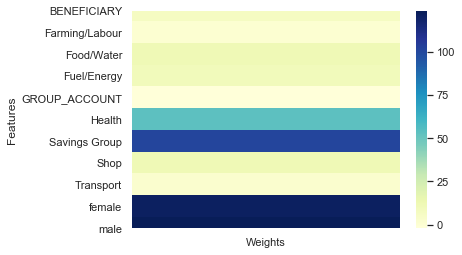

In [75]:
sns.heatmap(heatmap_1, cmap='YlGnBu')

### R-Squared


In [76]:
reg.score(x_scaled,y)

0.006884274875390116

### Adjusted R-Squared
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [77]:
x_scaled.shape

(17151, 11)

In [78]:
r2 = reg.score(x_scaled,y)

n = x_scaled.shape[0]
p = x_scaled.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.006246882205084292

# DISBURSEMENT transaction

### Checkpoint 3

In [79]:
dsb_df = df.copy()

In [80]:
dsb_df

,transfer_subtype,weight,Days_enrolled,BENEFICIARY,GROUP_ACCOUNT,female,male,Farming/Labour,Food/Water,Savings Group,Shop,Health,Fuel/Energy,Transport
0,DISBURSEMENT,18000.000000,188 days 04:49:09.781314,0,0,1,0,0,0,1,0,0,0,0
1,DISBURSEMENT,9047.660892,647 days 14:50:02,0,0,0,1,1,0,0,0,0,0,0
2,DISBURSEMENT,25378.726002,649 days 09:39:03,1,0,0,1,1,0,0,0,0,0,0
3,DISBURSEMENT,4495.932576,649 days 08:21:30,1,0,0,1,0,0,0,0,1,0,0
4,DISBURSEMENT,400.000000,647 days 09:49:33,1,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30291,RECLAMATION,309.000000,6 days 08:25:52.298338,1,0,1,0,0,0,0,0,0,0,0
30292,RECLAMATION,309.000000,6 days 08:12:00.827143,1,0,1,0,0,0,0,0,0,0,0
30293,DISBURSEMENT,617.000000,6 days 05:36:07.124150,1,0,1,0,0,1,0,0,0,0,0
30294,DISBURSEMENT,617.000000,6 days 04:55:54.195900,1,0,1,0,0,1,0,0,0,0,0


### Select 'Disbursement' rows

In [81]:
dsb_df.drop(std_df[std_df['transfer_subtype']== 'AGENT_OUT'].index,inplace=True)
dsb_df.drop(std_df[std_df['transfer_subtype']== 'STANDARD'].index,inplace=True)
dsb_df.drop(std_df[std_df['transfer_subtype']== 'RECLAMATION'].index,inplace=True)
dsb_df.head(10)

,transfer_subtype,weight,Days_enrolled,BENEFICIARY,GROUP_ACCOUNT,female,male,Farming/Labour,Food/Water,Savings Group,Shop,Health,Fuel/Energy,Transport
0,DISBURSEMENT,18000.000000,188 days 04:49:09.781314,0,0,1,0,0,0,1,0,0,0,0
1,DISBURSEMENT,9047.660892,647 days 14:50:02,0,0,0,1,1,0,0,0,0,0,0
2,DISBURSEMENT,25378.726002,649 days 09:39:03,1,0,0,1,1,0,0,0,0,0,0
3,DISBURSEMENT,4495.932576,649 days 08:21:30,1,0,0,1,0,0,0,0,1,0,0
4,DISBURSEMENT,400.000000,647 days 09:49:33,1,0,0,1,1,0,0,0,0,0,0
12,DISBURSEMENT,400.000000,646 days 11:21:17,1,0,0,1,0,0,0,0,1,0,0
17,DISBURSEMENT,621.689801,645 days 13:46:09,1,0,0,1,0,1,0,0,0,0,0
18,DISBURSEMENT,714.378298,645 days 13:10:40,1,0,0,1,0,0,0,1,0,0,0
19,DISBURSEMENT,268.709888,645 days 12:11:42,1,0,1,0,0,1,0,0,0,0,0
20,DISBURSEMENT,499.631281,645 days 11:24:01,1,0,1,0,0,0,0,1,0,0,0


In [82]:
dsb_df.iloc[:,3:]

,BENEFICIARY,GROUP_ACCOUNT,female,male,Farming/Labour,Food/Water,Savings Group,Shop,Health,Fuel/Energy,Transport
0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,0
4,1,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30290,1,0,1,0,0,0,0,0,0,0,0
30291,1,0,1,0,0,0,0,0,0,0,0
30292,1,0,1,0,0,0,0,0,0,0,0
30293,1,0,1,0,0,1,0,0,0,0,0


### Create the 'DISBURSEMENT' regression

### Declare the dependent and independent variable

In [83]:
X = dsb_df.iloc[:,3:]
Y = dsb_df['weight']

In [84]:
X.shape

(13145, 11)

In [85]:
Y.shape

(13145,)

### Feature Scaling

In [86]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [87]:
X_scaled = scaler.transform(X)

In [88]:
X_scaled

array([[-12.46948657,  -0.07472921,   0.7894557 , ...,  -0.15256385,
         -0.24737257,  -0.2317486 ],
       [-12.46948657,  -0.07472921,  -1.26669552, ...,  -0.15256385,
         -0.24737257,  -0.2317486 ],
       [  0.08019576,  -0.07472921,  -1.26669552, ...,  -0.15256385,
         -0.24737257,  -0.2317486 ],
       ...,
       [  0.08019576,  -0.07472921,   0.7894557 , ...,  -0.15256385,
         -0.24737257,  -0.2317486 ],
       [  0.08019576,  -0.07472921,   0.7894557 , ...,  -0.15256385,
         -0.24737257,  -0.2317486 ],
       [  0.08019576,  -0.07472921,   0.7894557 , ...,  -0.15256385,
         -0.24737257,  -0.2317486 ]])

### Regression itself

In [89]:
reg = LinearRegression()
reg.fit(X_scaled,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Coefficient

In [90]:
reg.coef_

array([ -107.96721372,   -77.20899597,  5132.28882166,  4899.20654925,
       -2692.6645118 , -2401.78359616,   580.52992311, -1807.46855005,
        -772.23222574, -1309.44223665, -1188.71218777])

### Bias

In [91]:
reg.intercept_

798.9130238850112

### Summary table

In [92]:
reg_summary_2 = pd.DataFrame([['BENEFICIARY'],['GROUP_ACCOUNT'],['female'],['male'],['Farming/Labour'],['Food/Water'],['Savings Group'],['Shop'],['Health'],['Fuel/Energy'],['Transport']] , columns=['Features'])
reg_summary_2['Weights'] = reg.coef_[0],reg.coef_[1],reg.coef_[2],reg.coef_[3],reg.coef_[4],reg.coef_[5],reg.coef_[6],reg.coef_[7],reg.coef_[8],reg.coef_[9],reg.coef_[10]

In [93]:
reg_summary_2

,Features,Weights
0,BENEFICIARY,-107.967214
1,GROUP_ACCOUNT,-77.208996
2,female,5132.288822
3,male,4899.206549
4,Farming/Labour,-2692.664512
5,Food/Water,-2401.783596
6,Savings Group,580.529923
7,Shop,-1807.468550
8,Health,-772.232226
9,Fuel/Energy,-1309.442237


In [94]:
reg_summary_2.to_csv(r'B:\My Works\Data Science\Grassroots\Disbursement_coef.csv',index=True)

In [95]:
heatmap_2 = pd.pivot_table(reg_summary_2, values='Weights', index=['Features'])

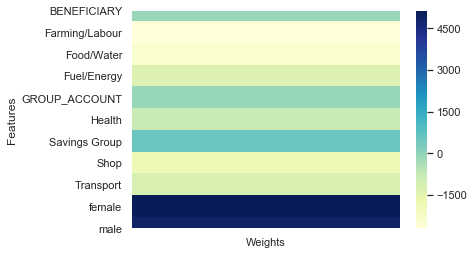

In [96]:
sns.heatmap(heatmap_2, cmap='YlGnBu')

### R_squared

In [97]:
reg.score(X_scaled,Y)

0.009637751025414754